<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.287579,93.201659,73.717321,69.330749,-0.000646,285.536663,285.537319,-0.000657
1,0.0,1.0,73.600363,97.219675,70.404173,75.735556,0.001841,326.961609,326.958343,0.003266
2,0.0,2.0,91.339962,89.587457,98.688189,63.990774,-0.004751,353.601630,353.605609,-0.003979
3,0.0,3.0,24.363394,66.545734,36.578584,36.434918,-0.000782,173.921849,173.928244,-0.006396
4,0.0,4.0,63.273703,80.654604,76.777429,93.864671,0.004315,324.574721,324.568979,0.005742
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,64.377897,43.745192,97.280042,56.721170,-0.000102,272.124199,272.128640,-0.004441
19996,999.0,16.0,92.798848,84.177846,20.415011,24.701017,-0.002240,232.090482,232.086504,0.003978
19997,999.0,17.0,21.404501,89.263965,90.484898,27.766027,0.004486,238.923876,238.924897,-0.001020
19998,999.0,18.0,26.858162,27.380943,58.075984,89.243482,0.047462,211.606033,211.568822,0.037210


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,39.287579,93.201659,73.717321,69.330749,-0.000646,285.536663,285.537319,-0.000657
1,0.0,1.0,73.600363,97.219675,70.404173,75.735556,0.001841,326.961609,326.958343,0.003266
2,0.0,2.0,91.339962,89.587457,98.688189,63.990774,-0.004751,353.601630,353.605609,-0.003979
3,0.0,3.0,24.363394,66.545734,36.578584,36.434918,-0.000782,173.921849,173.928244,-0.006396
4,0.0,4.0,63.273703,80.654604,76.777429,93.864671,0.004315,324.574721,324.568979,0.005742
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,64.377897,43.745192,97.280042,56.721170,-0.000102,272.124199,272.128640,-0.004441
19996,999.0,16.0,92.798848,84.177846,20.415011,24.701017,-0.002240,232.090482,232.086504,0.003978
19997,999.0,17.0,21.404501,89.263965,90.484898,27.766027,0.004486,238.923876,238.924897,-0.001020
19998,999.0,18.0,26.858162,27.380943,58.075984,89.243482,0.047462,211.606033,211.568822,0.037210


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    39.287579  93.201659  73.717321  69.330749 -0.000646  285.536663   
      1.0    73.600363  97.219675  70.404173  75.735556  0.001841  326.961609   
      2.0    91.339962  89.587457  98.688189  63.990774 -0.004751  353.601630   
      3.0    24.363394  66.545734  36.578584  36.434918 -0.000782  173.921849   
      4.0    63.273703  80.654604  76.777429  93.864671  0.004315  324.574721   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   64.377897  43.745192  97.280042  56.721170 -0.000102  272.124199   
      16.0   92.798848  84.177846  20.415011  24.701017 -0.002240  232.090482   
      17.0   21.404501  89.263965  90.484898  27.766027  0.004486  238.923876   
      18.0   26.858162  27.380943  58.075984  89.243482  0.047462  211.606033   
      19.0   86.616314  96.997351  29.227400  39.391150  0.005548  262.237764   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    285.537319 -0.000657  
      1.0    326.958343  0.003266  
      2.0    353.605609 -0.003979  
      3.0    173.928244 -0.006396  
      4.0    324.568979  0.005742  
...                 ...       ...  
999.0 15.0   272.128640 -0.004441  
      16.0   232.086504  0.003978  
      17.0   238.924897 -0.001020  
      18.0   211.568822  0.037210  
      19.0   262.229741  0.008023  

[20000 rows x 8 columns]

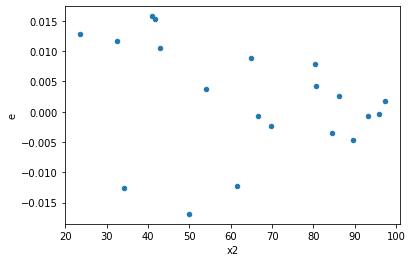

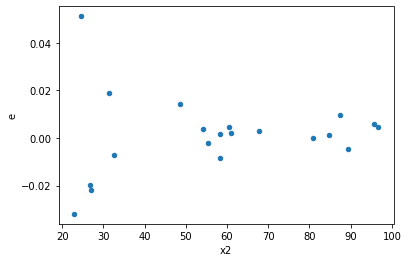

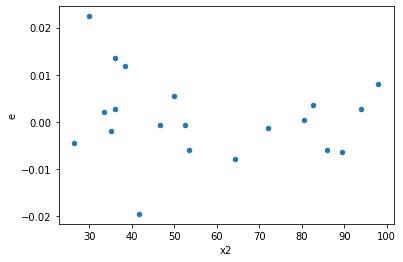

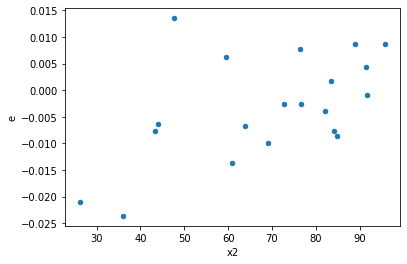

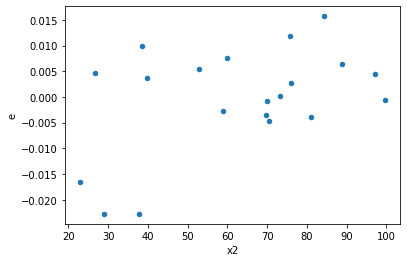

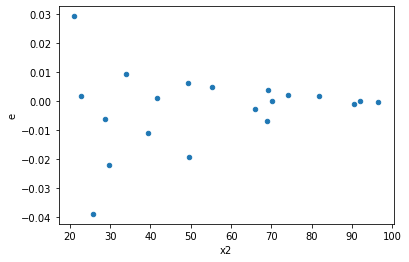

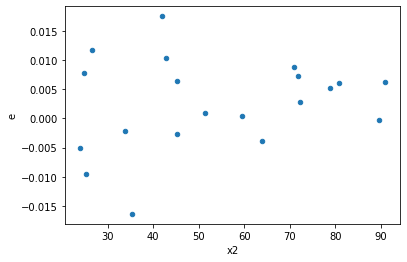

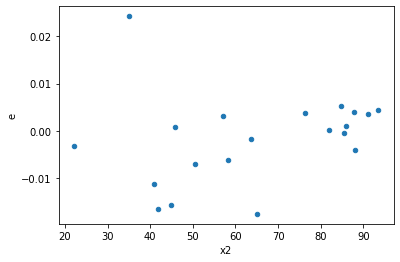

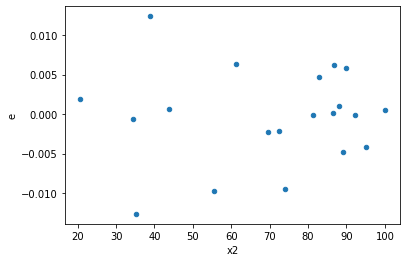

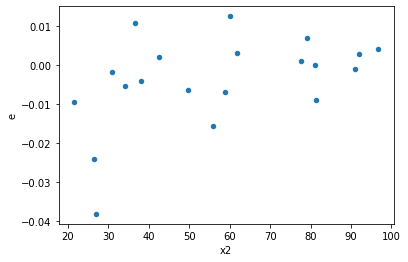

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,5.0,0.0002718113882640551,0.0007937331363014843,3.883019832343644e-05,0.00015874662726029687,4.088226022901444,0.14032966307629158,0.9298351684618542,0.07016483153814579,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.00012667067806433217,0.00028185931290275614,2.1111779677388697e-05,4.697655215045936e-05,2.225134634233255,0.35329597261835954,0.8233520136908202,0.17664798630917977,Reject005=1 : Homoscedasticity
4.0,5.0,7.0,0.00015753795542985315,0.0006901193960561346,3.150759108597063e-05,9.858848515087637e-05,3.129039122091908,0.16906453557547563,0.9154677322122622,0.08453226778773781,Reject005=1 : Homoscedasticity
5.0,7.0,5.0,9.653853346919267e-05,0.002327759178824714,1.3791219067027524e-05,0.00046555183576494285,33.75711991103083,0.0012939507136724426,0.9993530246431638,0.0006469753568362213,Reject005=0 : Heteroscedasticity
6.0,7.0,5.0,0.0001930312577679544,0.0005056023823483591,2.757589396685063e-05,0.00010112047646967182,3.666988152450476,0.17162307241774544,0.9141884637911273,0.08581153620887272,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,0.000171150103259159,0.00019498462090974445,2.852501720985983e-05,3.2497436818290744e-05,1.1392609013766983,0.8782862603765103,0.5608568698117449,0.4391431301882551,Reject005=1 : Homoscedasticity
10.0,6.0,6.0,0.00010687707019461958,0.0002232097058023249,1.7812845032436598e-05,3.720161763372082e-05,2.0884714129594633,0.39187198358991204,0.804064008205044,0.19593599179495602,Reject005=1 : Homoscedasticity
11.0,4.0,8.0,0.0005775308066115791,0.0012185490227537726,0.00014438270165289478,0.00015231862784422157,1.054964522068615,0.8748659841515862,0.5625670079242069,0.4374329920757931,Reject005=1 : Homoscedasticity
12.0,6.0,6.0,0.00022382065131382683,0.0005521432871903151,3.730344188563781e-05,9.202388119838585e-05,2.4669005471534238,0.29625882307945317,0.8518705884602734,0.14812941153972659,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,5.0,0.0002718113882640551,0.0007937331363014843,3.883019832343644e-05,0.00015874662726029687,4.088226022901444,0.14032966307629158,Reject005=1 : Homoscedasticity
1.0,7.0,5.0,0.002660105552997413,0.0001335207992893325,0.0003800150789996304,2.67041598578665e-05,0.07027131641240077,0.00299554092081987,Reject005=0 : Heteroscedasticity
2.0,7.0,5.0,0.00031640793801710544,0.00022970019807865434,4.520113400244363e-05,4.5940039615730866e-05,1.016347059196508,0.977552443892618,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.00012667067806433217,0.00028185931290275614,2.1111779677388697e-05,4.697655215045936e-05,2.225134634233255,0.35329597261835954,Reject005=1 : Homoscedasticity
4.0,5.0,7.0,0.00015753795542985315,0.0006901193960561346,3.150759108597063e-05,9.858848515087637e-05,3.129039122091908,0.16906453557547563,Reject005=1 : Homoscedasticity
5.0,7.0,5.0,9.653853346919267e-05,0.002327759178824714,1.3791219067027524e-05,0.00046555183576494285,33.75711991103083,0.0012939507136724426,Reject005=0 : Heteroscedasticity
6.0,7.0,5.0,0.0001930312577679544,0.0005056023823483591,2.757589396685063e-05,0.00010112047646967182,3.666988152450476,0.17162307241774544,Reject005=1 : Homoscedasticity
7.0,8.0,4.0,0.0012044430789177535,6.348929493334694e-05,0.0001505553848647192,1.5872323733336735e-05,0.10542514801180133,0.00791376575135899,Reject005=0 : Heteroscedasticity
8.0,6.0,6.0,0.000171150103259159,0.00019498462090974445,2.852501720985983e-05,3.2497436818290744e-05,1.1392609013766983,0.8782862603765103,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      639
Reject005=0 : Heteroscedasticity    361
Name: Result_test, dtype: int64